In [20]:
import importlib

import myutils
importlib.reload(myutils)
import myutils as myutils
import evaluation
importlib.reload(evaluation)

import mypytable
importlib.reload(mypytable)
from mypytable import MyPyTable 

import myclassifiers
importlib.reload(myclassifiers)
from myclassifiers import MyNaiveBayesClassifier,\
    MyDummyClassifier,\
    MyRandomForestClassifier

import numpy as np

import matplotlib.pyplot as plt

# Analyzing Health Risk Factors 
### Research Leaders: Sofia Verdie, Fiona Callahan 
##### **CPSC 322, Fall 2025**

### Introduction 

* describes dataset and classification task implemented 
* briefly describe findings 

### Exploratory Data Analysis 
* info about data 
* summary stats 
* data visualizations 

### Data Preprocessing 

**Our current dataset: full of 30,000 records**
    * We will be pairing this down to 5,000 random samples during classification 

In [21]:
# load the data into file 
our_data = MyPyTable().load_from_file("input_data/healthData.csv")

length, width = our_data.get_shape()
print("Length: ", length)
print("Width: ", width)

# cleaning data: remove rows with missing values in the "Gender" column, as well as the CLass label column 
our_data.remove_rows_with_missing_values("Gender")
our_data.remove_rows_with_missing_values("Medical Condition")
our_data.remove_rows_with_missing_values("Age")

# replacing other missing values with column avergae: need to do for other columns? 
our_data.replace_missing_values_with_column_average("Glucose")
our_data.replace_missing_values_with_column_average("Blood Pressure")
our_data.replace_missing_values_with_column_average("Cholesterol")


length, width = our_data.get_shape()
print("Length: ", length)
print("Width: ", width)


Length:  30000
Width:  20
Length:  18444
Width:  20


In [22]:
# summary stats
# can compute based on certain columns: EX: age, blood pressure, etc... 
# need to add more 
summary_stats = our_data.compute_summary_statistics(["Age", "LengthOfStay", "Glucose", "Cholesterol", "Blood Pressure"])
summary_stats.pretty_print()

attribute         min     max      mid       avg    median
--------------  -----  ------  -------  --------  --------
Age             10      89      49.5     54.6841    55
LengthOfStay     1      19      10        4.4068     4
Glucose         20.32  318.51  169.415  123.49     116.5
Cholesterol     95.73  355.27  225.5    213.161    211.87
Blood Pressure  74.24  226.38  150.31   140.422    140.422


In [23]:
# reducing size of instances to 5000 for classification 

np.random.seed(0)
scaled_down_indexes = np.random.choice(21706, size=5000, replace=False)
table = []
for i in range(len(our_data.data)):
    if i in scaled_down_indexes:
        table.append(our_data.data[i])

# data set is now full of 5000 instances [scaled down] - to classify on 
print(len(table))

4268


### Classification Results 

* using dummy, naive bayes, random forest 

Keeping Attributes: Age, Gender, Blood Pressure, BMI, Length of Stay, Family History, Cholesterol, Oxygen Saturation, Physical Activity 

In [24]:
# seems to be most important attributes: but produces horrible accuracy, so scale down ! 
# keep = ["Age", "Gender", "Glucose", "Blood Pressure", "BMI", "Oxygen Saturation", "LengthOfStay", "Cholesterol", "Physical Activity", "Medical Condition"]

#####
# keep = ["Age", "Gender", "Family History", "Medical Condition"] --- 88% on naive



#### -- 68% accuracy on naive bayes 
keep = ["Smoking", "Alcohol", "Physical Activity", "Diet Score", "Stress Level", "Sleep Hours", "Family History", "Medical Condition"] 



keep_indexes = []
for i in keep:
    column_index = our_data.column_names.index(i)
    keep_indexes.append(column_index)

# make new data table of just the indexes we want 
# new structure: the keep list [use in future as header]
new_table = [[row[j] for j in keep_indexes] for row in table]


#bmi_index = keep.index("BMI")
#bp_index = keep.index("Blood Pressure")
#glucose_index = keep.index("Glucose")

# now need to discretize: look at utils 
#for row in new_table:
    #row[bmi_index] = myutils.bin_bmi(float(row[bmi_index]))
    #row[bp_index]  = myutils.bin_bp(float(row[bp_index]))
    #row[glucose_index] = myutils.bin_glucose(float(row[glucose_index]))

# do i need to normalize? 

for i in range(len(new_table)):
    if new_table[i][-1] != "Healthy":
        new_table[i][-1] = "Not Healthy"

print(new_table)

# train/test split 
# making y_train and y_test 
y = myutils.make_y_col_lists(keep, "Medical Condition", new_table)
X = [row[:-1] for row in new_table]
X_train, X_test, y_train, y_test = evaluation.train_test_split(X, y)


# dummy classifier: 
dummy_clf = MyDummyClassifier()
dummy_clf.fit(X_train, y_train)
predictions = dummy_clf.predict(X_test)
acc = evaluation.accuracy_score(y_test, predictions)
print("Dummy Classifier accuracy: ", acc)


# naive bayes:
naive_bayes = MyNaiveBayesClassifier()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)
acc = evaluation.accuracy_score(y_test, predictions)
print("Naive Bayes accuracy: ", acc)


# now need to do random forest 
random_forest = MyRandomForestClassifier()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
acc = evaluation.accuracy_score(y_test, predictions)
print("Decision tree accuracy: ", acc)

    

[[1.0, 0.0, 5.27, 5.63, 7.09, 5.41, 0.0, 'Not Healthy'], [1.0, 1.0, 4.33, 0.37, 6.26, 6.85, 1.0, 'Not Healthy'], [1.0, 1.0, 4.97, 4.17, 7.73, 6.47, 0.0, 'Not Healthy'], [0.0, 1.0, 5.58, 1.29, 7.71, 7.29, 1.0, 'Not Healthy'], [0.0, 0.0, 1.6, 2.2, 6.03, 5.1, 0.0, 'Not Healthy'], [0.0, 0.0, 9.83, 6.71, 4.42, 8.22, 1.0, 'Healthy'], [0.0, 1.0, 3.37, 7.44, 7.67, 6.12, 1.0, 'Not Healthy'], [0.0, 0.0, 3.08, 3.47, 3.72, 6.28, 0.0, 'Not Healthy'], [0.0, 0.0, 0.55, 2.7, 2.35, 6.7, 0.0, 'Not Healthy'], [1.0, 0.0, 3.97, 3.0, 7.64, 6.79, 0.0, 'Not Healthy'], [0.0, 0.0, 3.72, 3.99, 2.77, 6.7, 0.0, 'Not Healthy'], [0.0, 0.0, 6.51, 4.32, 6.33, 6.13, 0.0, 'Not Healthy'], [0.0, 0.0, 5.85, 4.77, 3.58, 5.45, 0.0, 'Not Healthy'], [0.0, 1.0, 3.09, 2.44, 5.45, 6.59, 1.0, 'Not Healthy'], [0.0, 0.0, 8.93, 2.04, 5.75, 6.8, 1.0, 'Not Healthy'], [0.0, 0.0, 3.47, 2.9, 3.48, 7.46, 0.0, 'Not Healthy'], [0.0, 0.0, 2.45, 4.37, 3.86, 7.26, 1.0, 'Not Healthy'], [0.0, 1.0, 4.04, 4.01, 4.48, 6.96, 0.0, 'Not Healthy'], [1.0

In [25]:
# now time to predict: 
# issue is honestly cross_val predict so maybe stick to pure accuracy: but this is helpful for future
d_accuracy, d_error_rate, y_true_dummy, y_pred_dummy = myutils.cross_val_predict(X_train, y_train, dummy_clf)
print("Dummy Classifier: accuracy = ", d_accuracy, "error rate = ", d_error_rate)

n_accuracy, n_error_rate, n_true, n_pred = myutils.cross_val_predict(X_train, y_train, naive_bayes)
print("Naive Bayes Classifier: accuracy = ", n_accuracy, "error rate = ", n_error_rate)

r_accuracy, r_error_rate, r_true, r_pred = myutils.cross_val_predict(X_train, y_train, random_forest)
print("Random Forest Classifier: accuracy = ", r_accuracy, "error rate = ", r_error_rate)

Dummy Classifier: accuracy =  0.8842252535851697 error rate =  0.11577474641483032
Naive Bayes Classifier: accuracy =  0.6488282616299406 error rate =  0.35117173837005944
Random Forest Classifier: accuracy =  0.8188177684505071 error rate =  0.18118223154949287


In [ ]:
d_precision = evaluation.binary_precision_score(y_true_dummy, y_pred_dummy, labels=None, pos_label="Not Healthy")
d_recall =evaluation.binary_recall_score(y_true_dummy, y_pred_dummy, labels=None, pos_label="Not Healthy")
d_f1 = evaluation.binary_f1_score(y_true_dummy, y_pred_dummy, labels=None, pos_label="Not Healthy")
print("For Dummy Classifier: ")
print("precision: ", d_precision)
print("recall: ", d_recall)
print("F1 score: ", d_f1)


n_precision = evaluation.binary_precision_score(n_true, n_pred, labels=None, pos_label="Not Healthy")
n_recall =evaluation.binary_recall_score(n_true, n_pred, labels=None, pos_label="Not Healthy")
n_f1 = evaluation.binary_f1_score(n_true, n_pred, labels=None, pos_label="Not Healthy")
print("For Naive Bayes Classifier: ")
print("precision: ", n_precision)
print("recall: ", n_recall)
print("F1 score: ", n_f1)


r_precision = evaluation.binary_precision_score(r_true, r_pred, labels=None, pos_label="Not Healthy")
r_recall =evaluation.binary_recall_score(r_true, r_pred, labels=None, pos_label="Not Healthy")
r_f1 = evaluation.binary_f1_score(r_true, r_pred, labels=None, pos_label="Not Healthy")
print("For Random Forest Classifier: ")
print("precision: ", r_precision)
print("recall: ", r_recall)
print("F1 score: ", r_f1)

For Dummy Classifier: 
precision:  0
recall:  0.0
F1 score:  0
For Naive Bayes Classifier: 
precision:  0.9117647058823529
recall:  0.0274822695035461
F1 score:  0.05335628227194492
For Random Forest Classifier: 
precision:  0.53
recall:  0.15987933634992457
F1 score:  0.2456546929316338


In [39]:
from tabulate import tabulate 
labels = sorted(set(y_train))

matrix_dummy = evaluation.confusion_matrix(y_true_dummy, y_pred_dummy, labels)
matrix_naive = evaluation.confusion_matrix(n_true, n_pred, labels)
matrix_forest = evaluation.confusion_matrix(r_true, r_pred, labels)

print("Dummy Classifier: (10 fold cross validation results)")
print(tabulate(matrix_dummy, headers=labels, showindex=labels, tablefmt="grid"))

print("Naive Bayes Classifier: (10 fold cross validation results)")
print(tabulate(matrix_naive, headers=labels, showindex=labels, tablefmt="grid"))

print("Random Forest Classifier: (10 fold cross validation results)")
print(tabulate(matrix_forest, headers=labels, showindex=labels, tablefmt="grid"))

Dummy Classifier: (10 fold cross validation results)
+-------------+-----------+---------------+
|             |   Healthy |   Not Healthy |
+=============+===========+===============+
| Healthy     |         0 |           393 |
+-------------+-----------+---------------+
| Not Healthy |         0 |          2957 |
+-------------+-----------+---------------+
Naive Bayes Classifier: (10 fold cross validation results)
+-------------+-----------+---------------+
|             |   Healthy |   Not Healthy |
+=============+===========+===============+
| Healthy     |        31 |           362 |
+-------------+-----------+---------------+
| Not Healthy |         3 |          2954 |
+-------------+-----------+---------------+
Random Forest Classifier: (10 fold cross validation results)
+-------------+-----------+---------------+
|             |   Healthy |   Not Healthy |
+=============+===========+===============+
| Healthy     |       106 |           287 |
+-------------+-----------+--------

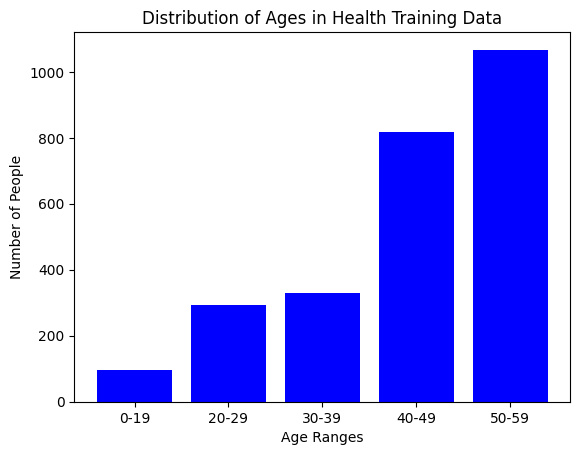

In [26]:
# ages = [row[0] for row in table]
ages = []
for row in table:
    age = row[0]
    ages.append(int(age))
    
bins = [0, 20, 30, 40, 50, 60]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59']
age_counts = [0] * (len(bins) - 1)

for age in ages:
    for i in range(len(bins) - 1):
        if bins[i] <= age < bins[i+1]:
            age_counts[i] += 1
            break

plt.figure()
plt.bar(labels, age_counts, color='blue')

plt.title("Distribution of Ages in Health Training Data")
plt.xlabel("Age Ranges")
plt.ylabel("Number of People")

plt.show()

Text(0.5, 1.0, 'BMI Category Distribution in Health Training Data')

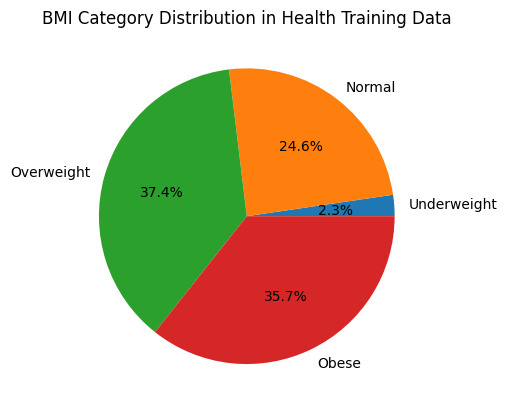

In [32]:
bmis = []
for row in table:
    try:
        bmis.append(float(row[5]))
    except ValueError:
        continue

categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
counts = {cat: 0 for cat in categories}

for bmi in bmis:
    category = myutils.bin_bmi(bmi)
    counts[category] += 1

plt.figure()
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.title('BMI Category Distribution in Health Training Data')


### Conclusion 

### Acknowledgements 